<a href="https://colab.research.google.com/github/wilsongutierrez-01/ProgramacionPython/blob/main/AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow_datasets as tfds

In [ ]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]
print(datos_entrenamiento)

Dl Completed...:   0%|          | 0/4 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to ~/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [ ]:
numeros_letras = ["Cero","Uno","Dos","Tres","Cuatro","Cinco","Seis","Siete",
                  "Ocho","Nueve"]

In [ ]:
numeros_ejemplo_entrenamiento = metadata.splits["train"].num_examples
numeros_ejemplo_prueba = metadata.splits["test"].num_examples
print(numeros_ejemplo_entrenamiento, numeros_ejemplo_prueba)

60000 10000


In [ ]:
def normalizacion(images, labels):
  images = tf.cast(images,tf.float32)
  images /= 255
  return images, labels

In [ ]:
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [ ]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [ ]:
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [ ]:
batchsize = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(numeros_ejemplo_entrenamiento).batch(batchsize)
datos_prueba = datos_prueba.repeat().shuffle(numeros_ejemplo_prueba).batch(batchsize)

In [ ]:
modelo.fit(datos_entrenamiento, epochs=5,
           steps_per_epoch=math.ceil(numeros_ejemplo_entrenamiento/batchsize))

Epoch 1/5
1875/1875 [==============================] - 11s 3ms/step - loss: 0.2760 - accuracy: 0.9193
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1244 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0898 - accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0705 - accuracy: 0.9776
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0588 - accuracy: 0.9812


In [ ]:
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(numeros_ejemplo_prueba/batchsize))
print("Resultados: ", test_loss, test_accuracy)

313/313 [==============================] - 2s 3ms/step - loss: 0.0922 - accuracy: 0.9711
Resultados:  0.0921686440706253 0.9711461663246155


In [ ]:
def graficar_imagen(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[..., 0], cmap = plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_labels:
    color = "green"
    plt.xlabel("Prediccion: {}".format(numeros_letras[predicted_label]), color = color)
  else:
    color = "blue"
    plt.xlabel("Prediccion: {}".format(numeros_letras[predicted_label]), color = color)

In [ ]:
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

In [ ]:
def graficar_valores_array(i,predictions_array,true_label):
  predictions_array,true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#888888")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

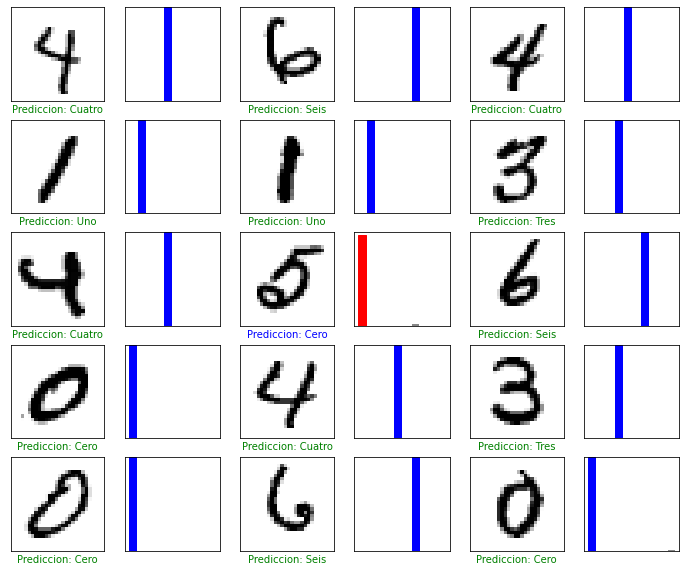

In [ ]:
numrows = 5
numcols = 3
numimages = numrows * numcols

plt.figure(figsize = (2*2*numcols, 2*numrows))
for i in range(numimages):
  plt.subplot(numrows, 2*numcols, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(numrows, 2*numcols, 2*i+2)
  graficar_valores_array(i, predicciones, etiquetas_prueba)

plt.show()

AI con imagenes
**********************************************

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import math
import tensorflow_datasets as tfds

In [2]:
dataset, metadata = tfds.load('fashion_mnist', as_supervised=True, with_info=True)
datos_entrenamiento, datos_prueba = dataset["train"], dataset["test"]
print(datos_entrenamiento)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5Q0SXA/fashion_mnist-train.tfrecord*...:   0%|  …

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling ~/tensorflow_datasets/fashion_mnist/3.0.1.incomplete5Q0SXA/fashion_mnist-test.tfrecord*...:   0%|   …

Dataset fashion_mnist downloaded and prepared to ~/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.
<PrefetchDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.uint8, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>


In [3]:
prendas = ["Top","Pantalon","Jersy","Vestido","Abrigo","Sandalias","Camisa","Zapatillas",
                  "Bolsas","Botines"]

In [5]:
prendas_ejemplo_entrenamiento = metadata.splits["train"].num_examples
prendas_ejemplo_prueba = metadata.splits["test"].num_examples
print(prendas_ejemplo_entrenamiento, prendas_ejemplo_prueba)

60000 10000


In [6]:
def normalizacion(images, labels):
  images = tf.cast(images,tf.float32)
  images /= 255
  return images, labels

In [7]:
datos_entrenamiento = datos_entrenamiento.map(normalizacion)
datos_prueba = datos_prueba.map(normalizacion)

In [8]:
modelo = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(64, activation=tf.nn.relu),
    tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [9]:
modelo.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=['accuracy']
)

In [10]:
batchsize = 32
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(prendas_ejemplo_entrenamiento).batch(batchsize)
datos_prueba = datos_prueba.repeat().shuffle(prendas_ejemplo_prueba).batch(batchsize)

In [22]:
modelo.fit(datos_entrenamiento, epochs=100,
           steps_per_epoch=math.ceil(prendas_ejemplo_entrenamiento/batchsize))

Epoch 1/100
1875/1875 [==============================] - 10s 4ms/step - loss: 0.1884 - accuracy: 0.9283
Epoch 2/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1848 - accuracy: 0.9293
Epoch 3/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1876 - accuracy: 0.9285
Epoch 4/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1792 - accuracy: 0.9323
Epoch 5/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1751 - accuracy: 0.9332
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1706 - accuracy: 0.9348
Epoch 7/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1704 - accuracy: 0.9342
Epoch 8/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1657 - accuracy: 0.9372
Epoch 9/100
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1606 - accuracy: 0.9382
Epoch 10/100
1875/1875 [==============================] - 7s 4ms/step - 

In [23]:
test_loss, test_accuracy = modelo.evaluate(datos_prueba, steps=math.ceil(prendas_ejemplo_prueba/batchsize))
print("Resultados: ", test_loss, test_accuracy)

313/313 [==============================] - 1s 3ms/step - loss: 0.8580 - accuracy: 0.8850
Resultados:  0.8580288290977478 0.884984016418457


In [24]:
def graficar_imagen(i, predictions_array, true_labels, images):
  predictions_array, true_labels, img = predictions_array[i], true_labels[i], images[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img[..., 0], cmap = plt.cm.binary)
  
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_labels:
    color = "green"
    plt.xlabel("Prediccion: {}".format(prendas[predicted_label]), color = color)
  else:
    color = "blue"
    plt.xlabel("Prediccion: {}".format(prendas[predicted_label]), color = color)

In [25]:
for imagenes_prueba, etiquetas_prueba in datos_prueba.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)

In [26]:
def graficar_valores_array(i,predictions_array,true_label):
  predictions_array,true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#888888")
  plt.ylim([0,1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

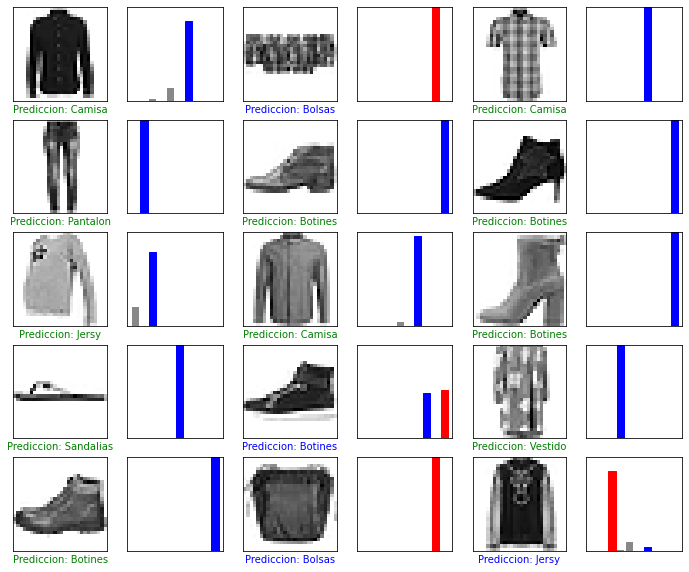

In [27]:
numrows = 5
numcols = 3
numimages = numrows * numcols

plt.figure(figsize = (2*2*numcols, 2*numrows))
for i in range(numimages):
  plt.subplot(numrows, 2*numcols, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(numrows, 2*numcols, 2*i+2)
  graficar_valores_array(i, predicciones, etiquetas_prueba)

plt.show()